In [1]:
# imports from custom library (this won't be shown in the HTML version)
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mlrefined_libraries import convnets_library as convlib
from mlrefined_libraries import basics_library as baslib
import autograd.numpy as np
import pandas as pd
import cv2

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

\begin{equation}
y_{n_1,\,n_2} = \underset{\ell_1=-L_1}{\overset{L_1}{\sum}}\underset{\ell_2=-L_2}{\overset{L_2}{\sum}}{w_{\ell_1,\,\ell_2}\,x_{n_1+\ell_1,\,n_2+\ell_2}}, \qquad n_1=1,2,\ldots,N_1,\,n_2=1,2,\ldots,N_2  
\end{equation}


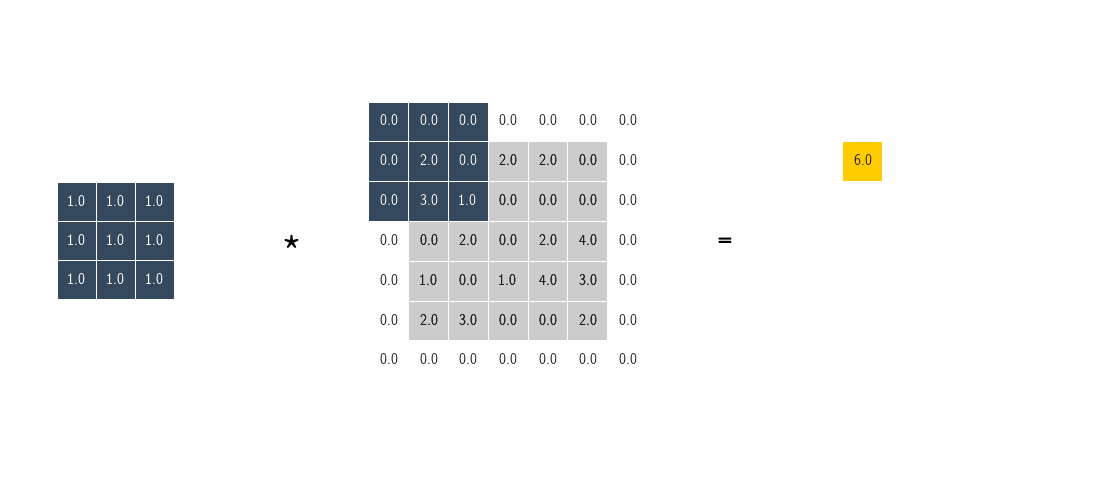
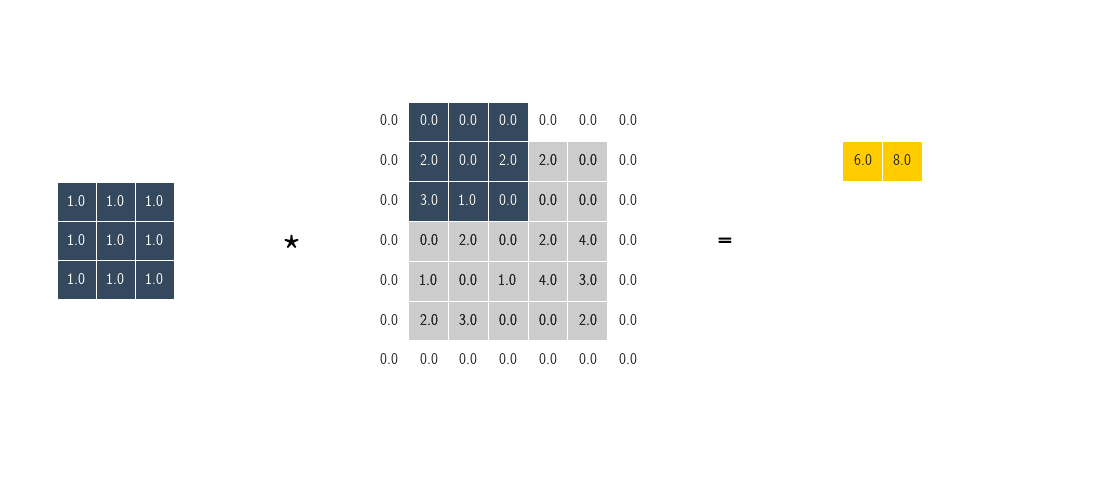
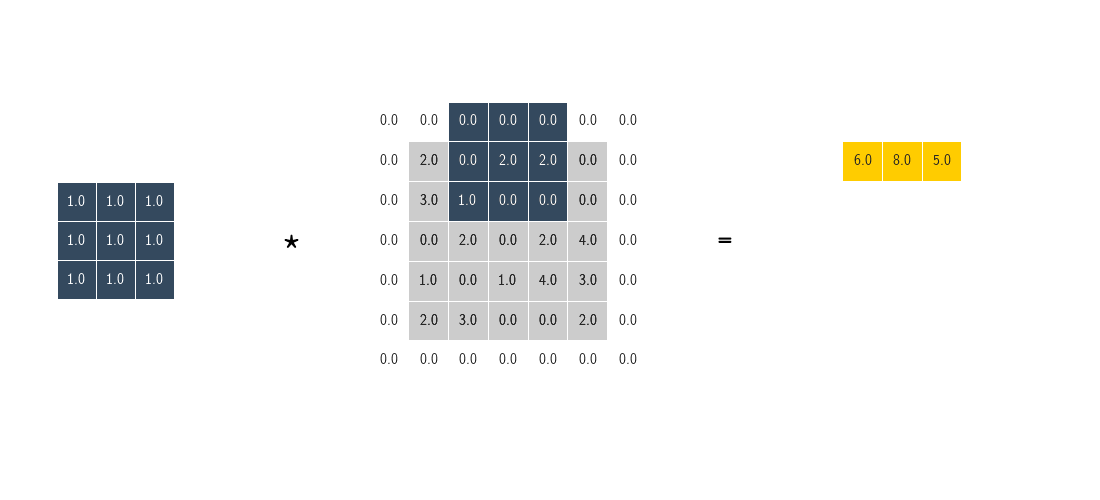
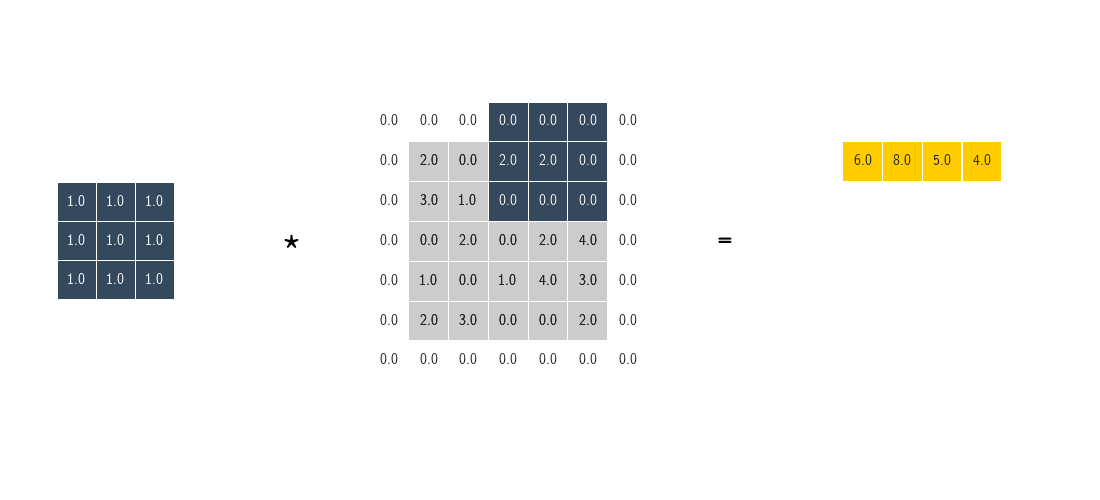
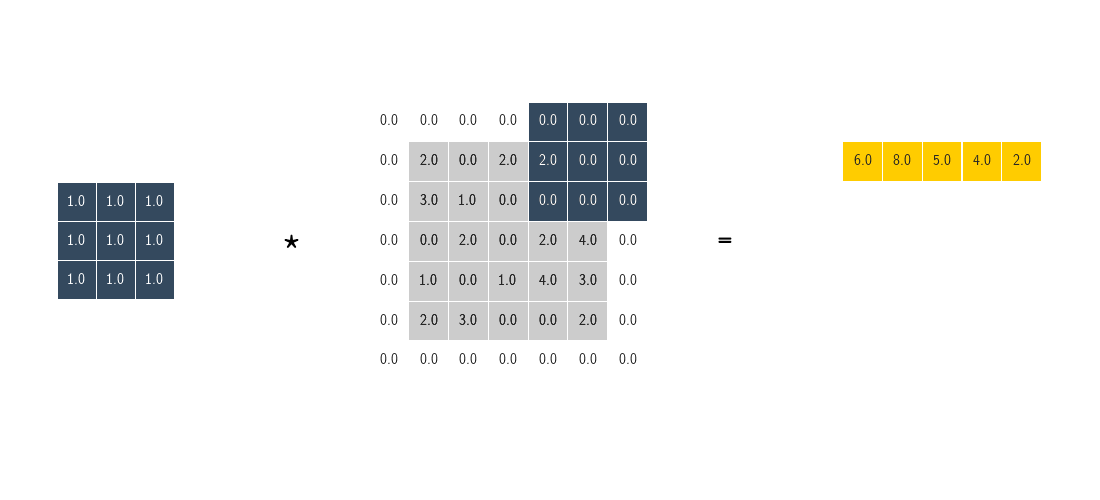
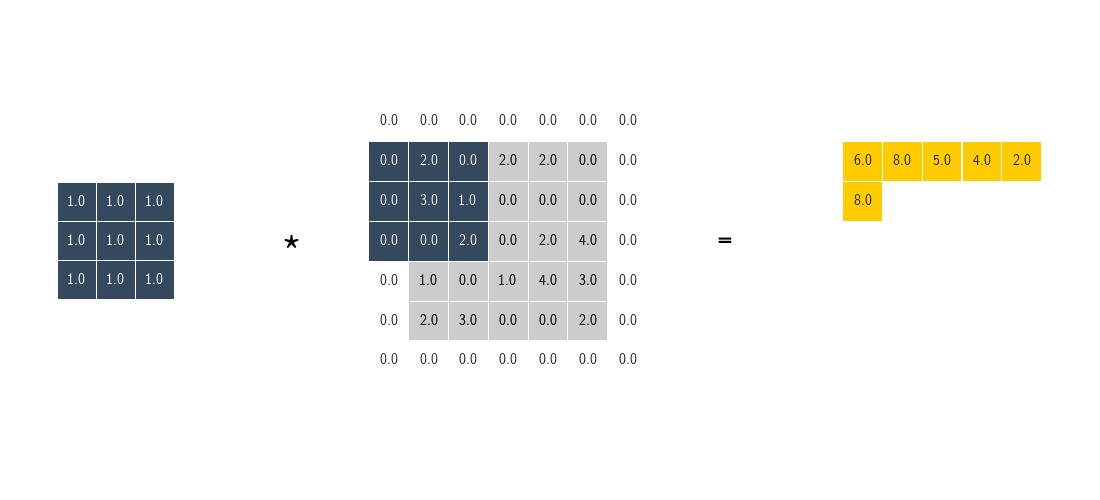
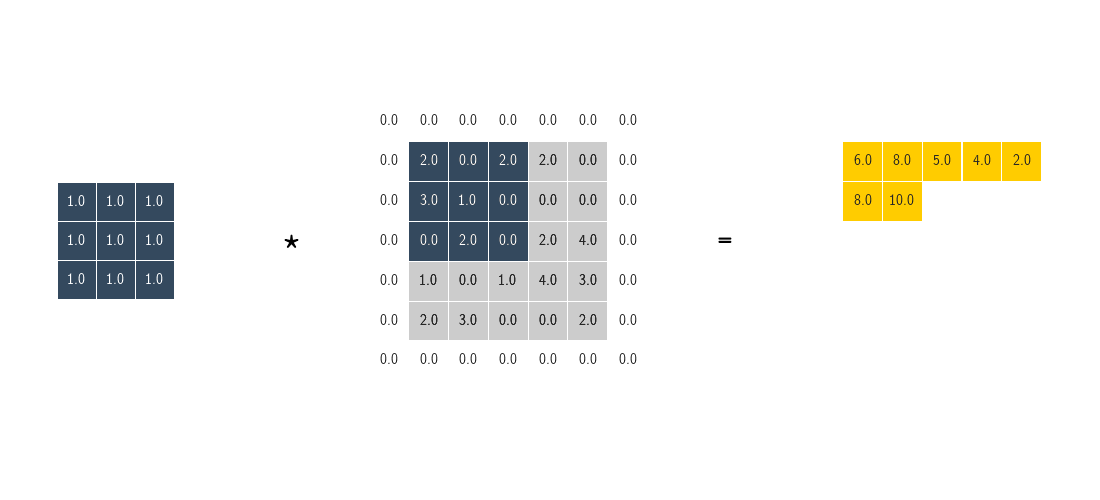
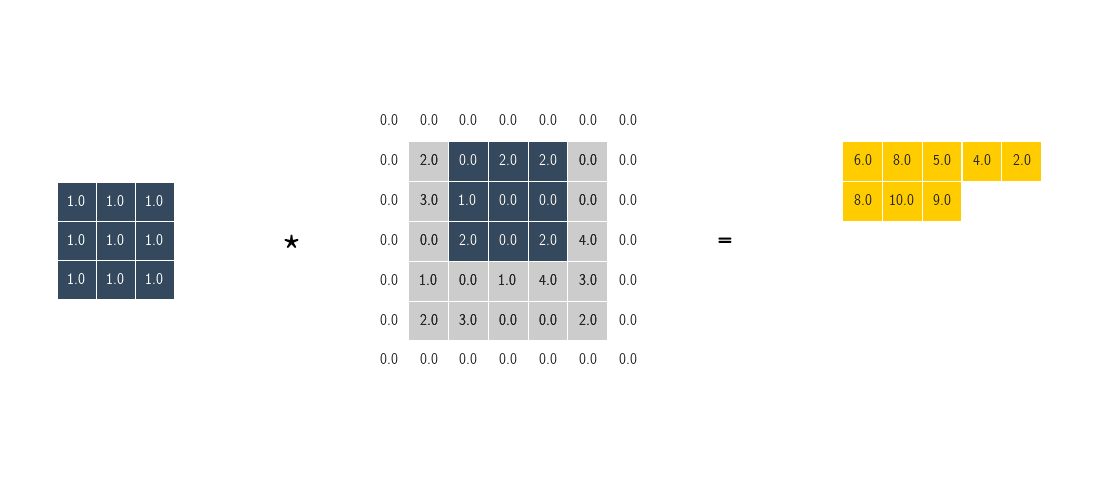
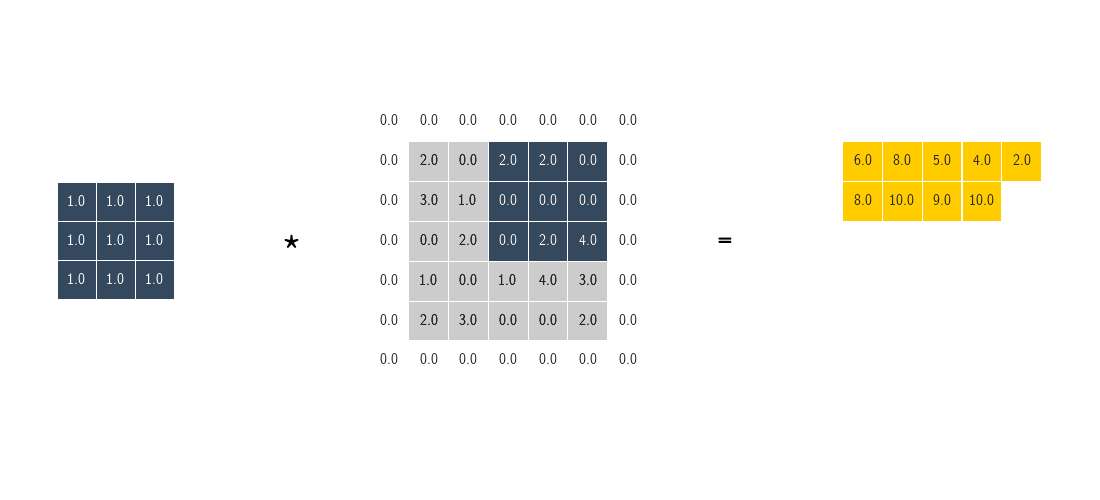
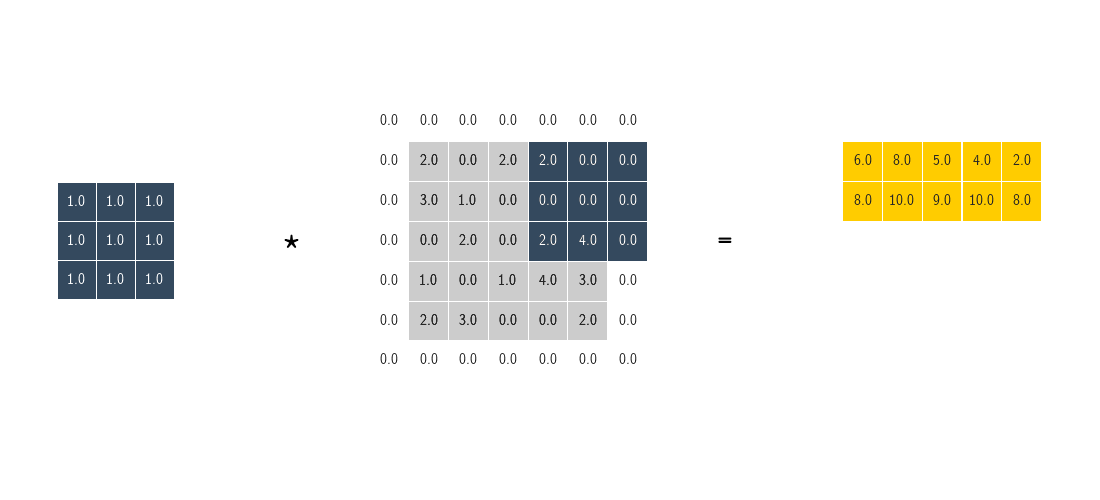
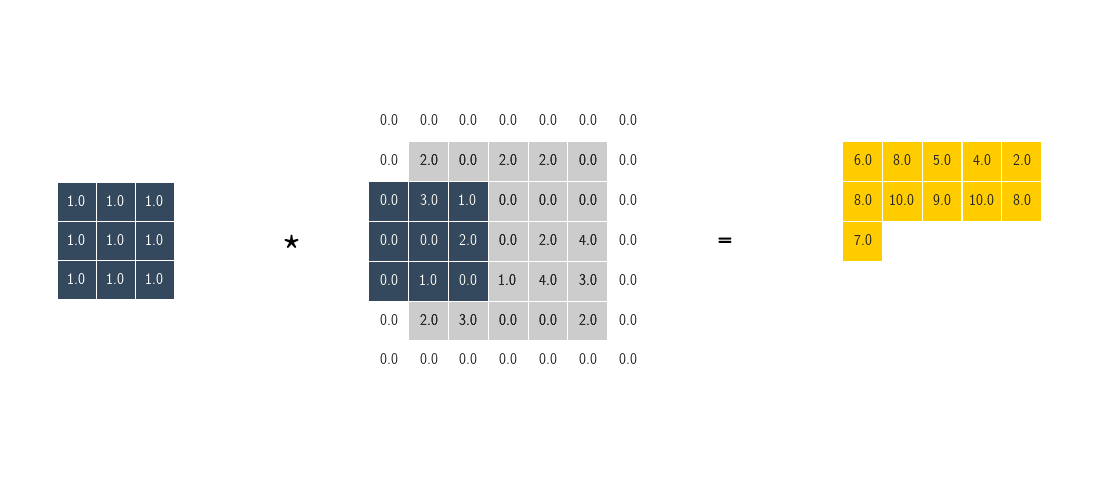
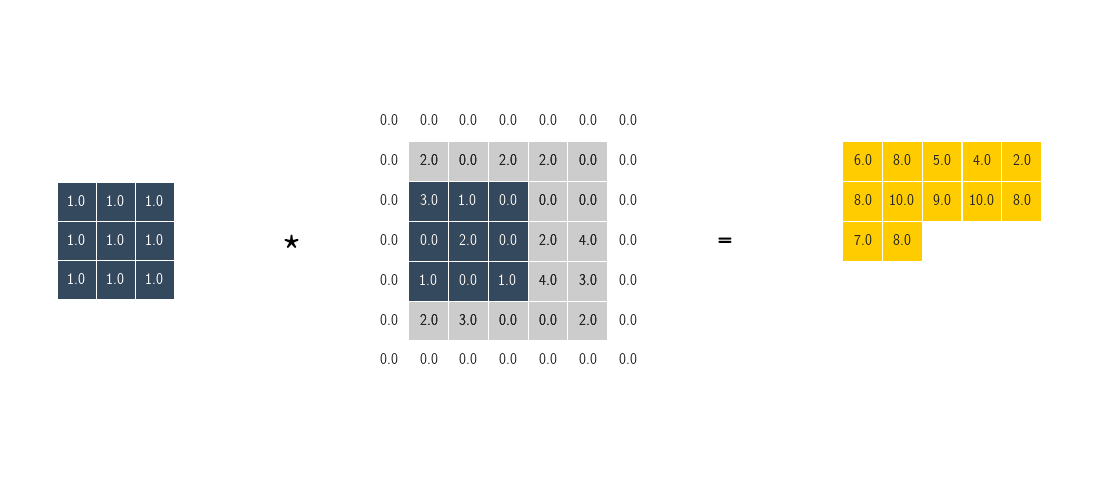
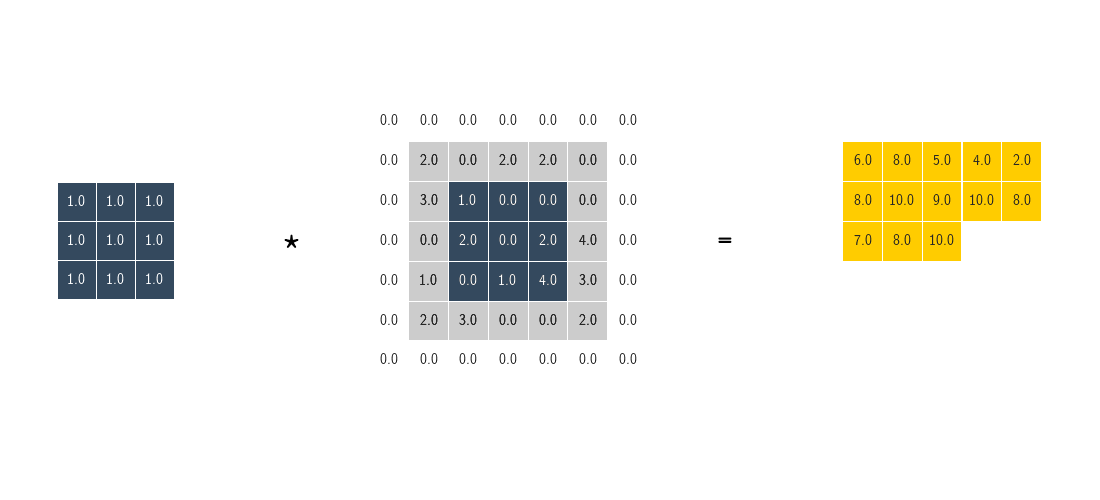
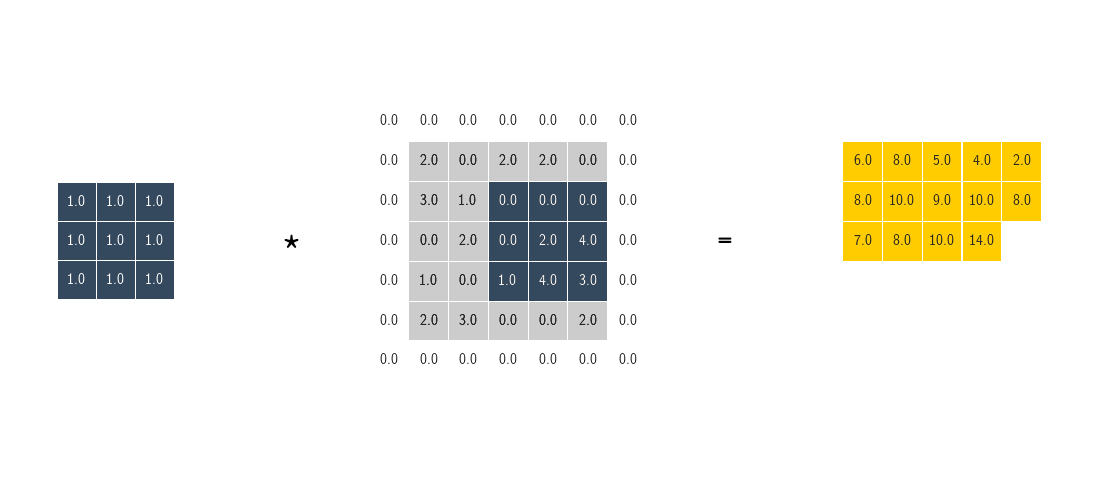
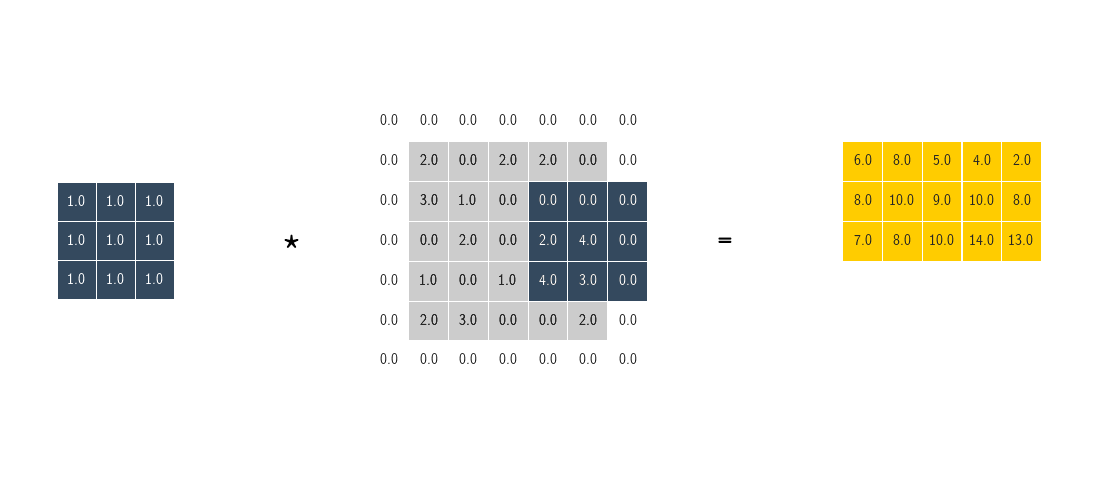
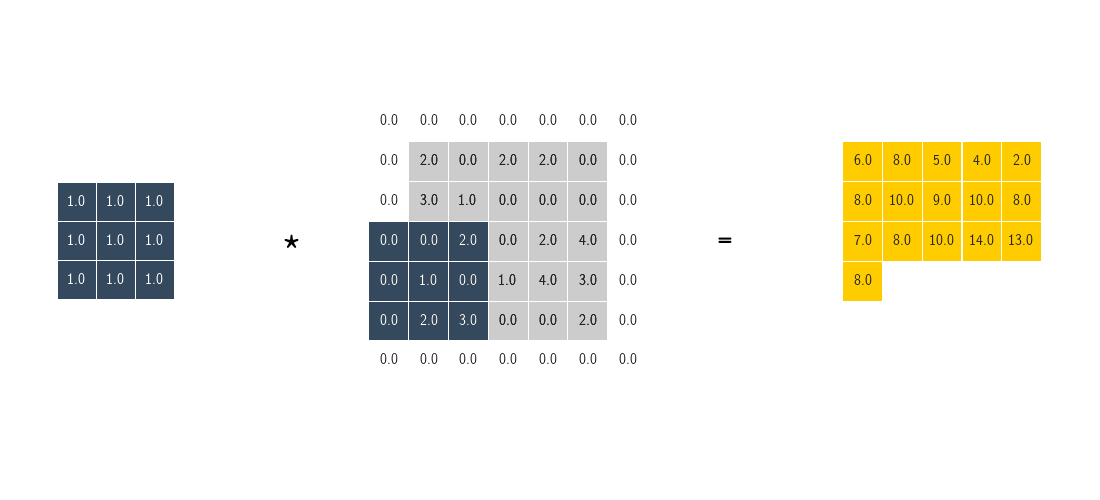
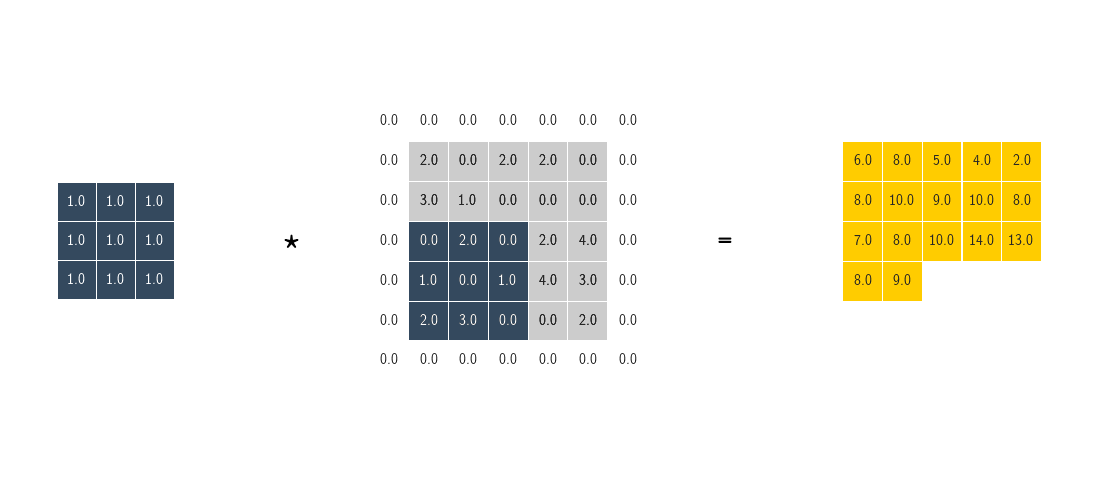
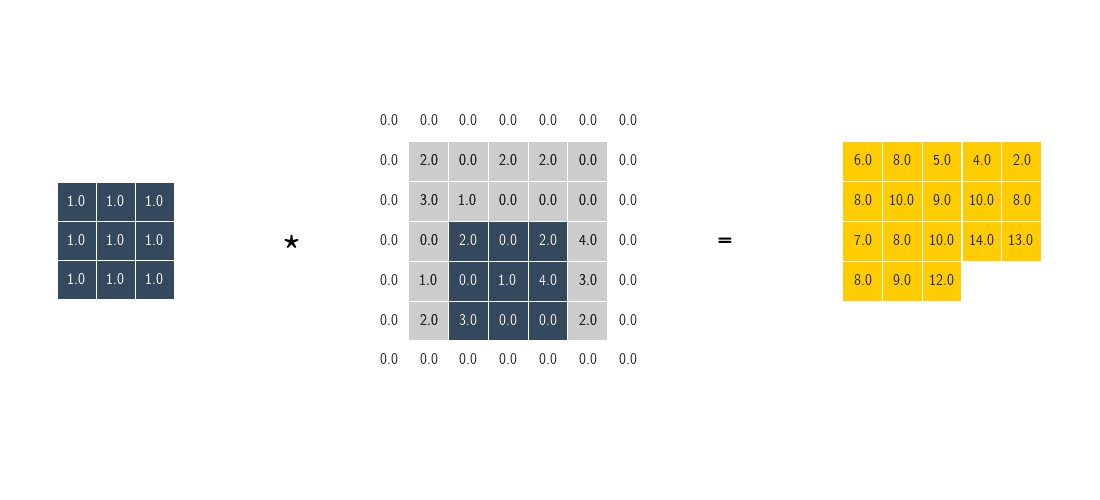
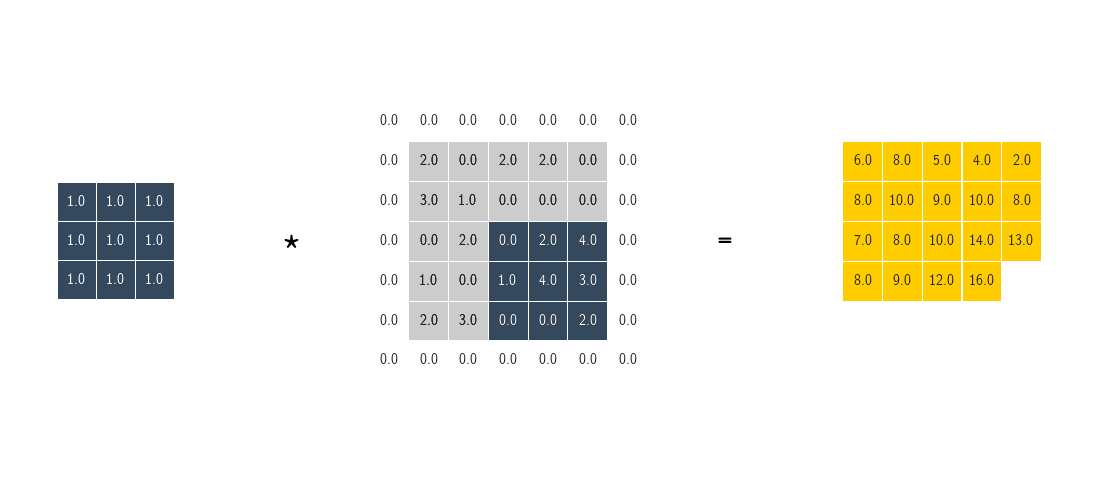
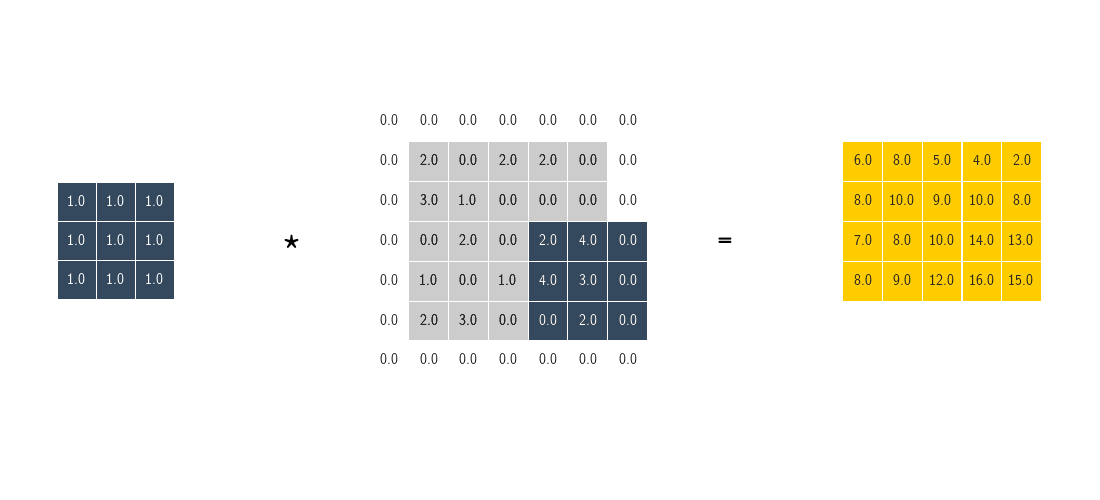
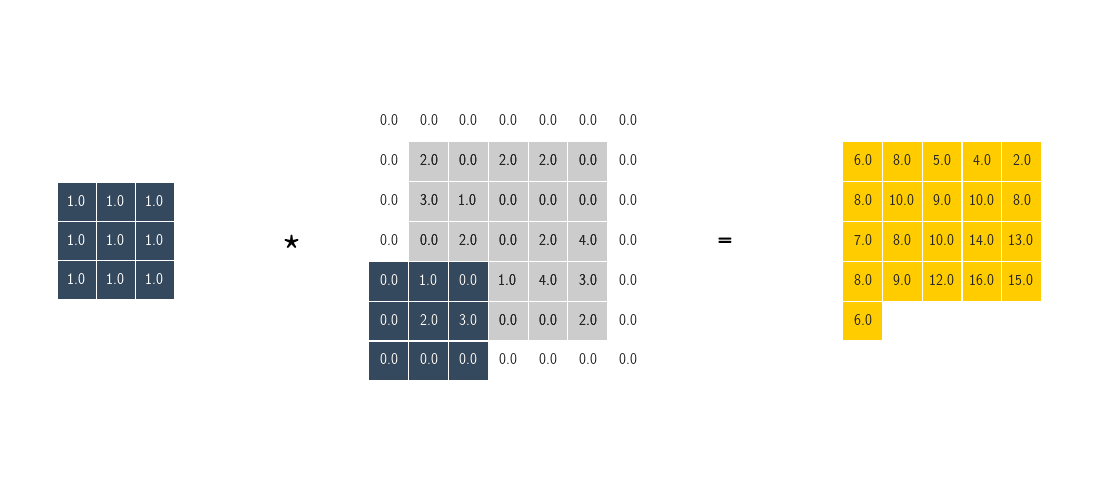
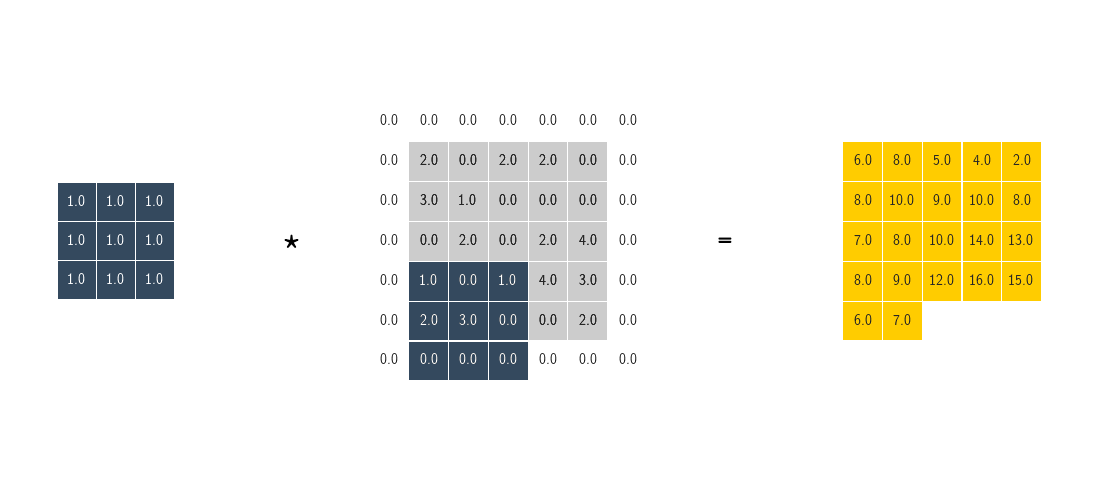
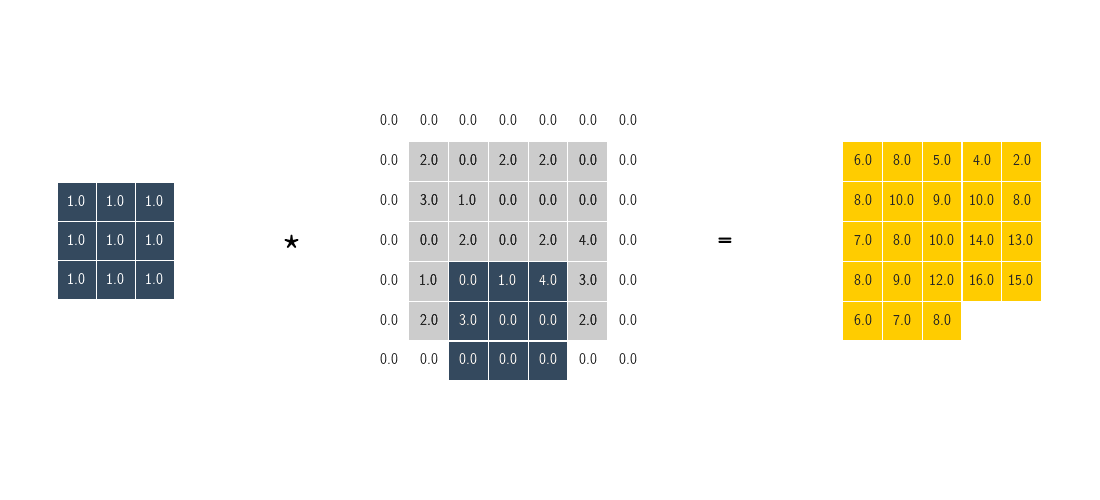
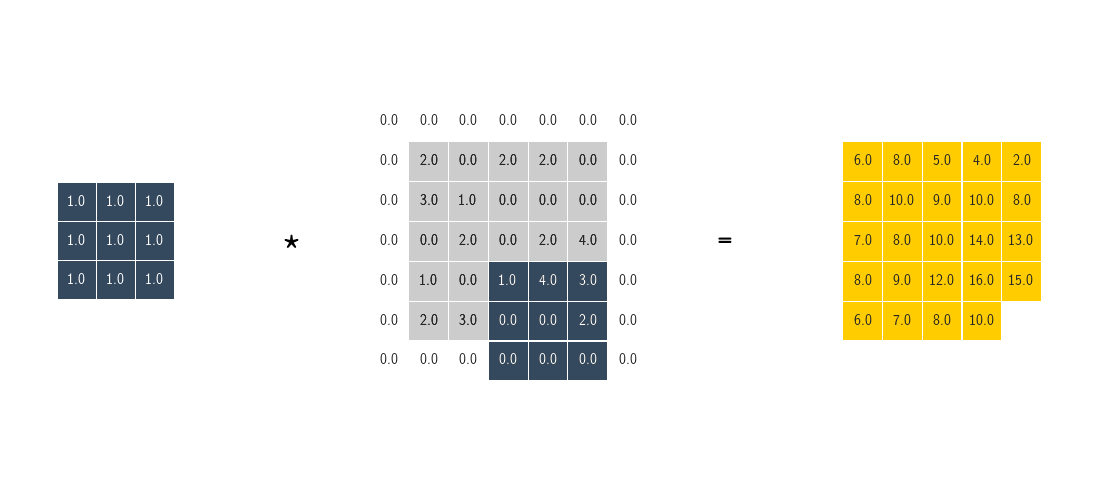
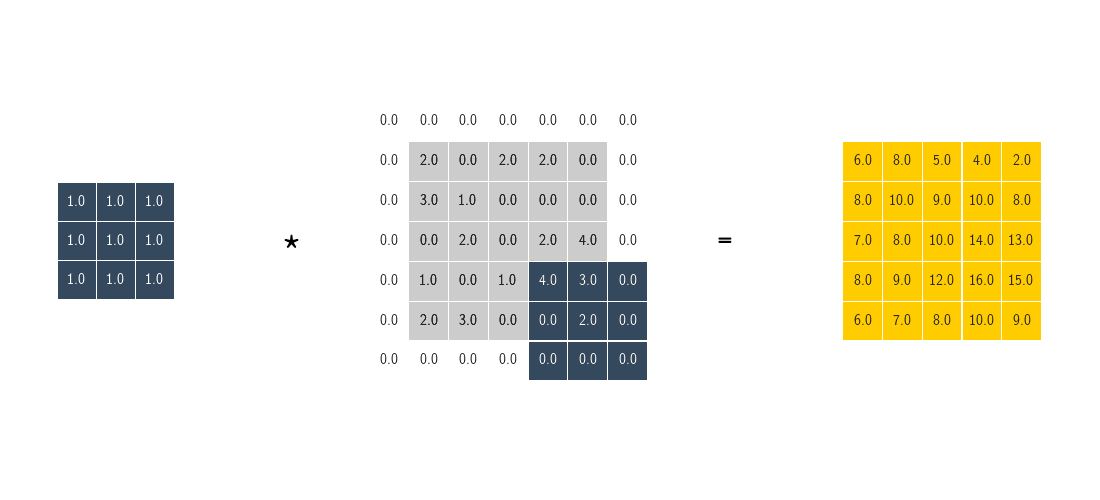

In [2]:
image = np.random.randint(5, size=(5,5))
kernel = np.ones((3,3))

# create an instance of the visualizer with this input sequence
conv_viz = convlib.sliding_convolution.visualizer(image = image, kernel = kernel)

# run the visualizer for our chosen input sequence
conv_viz.draw_it()

In [3]:
def myZeroPadding(img, kernel_size):
            
    # add top and bottom paddings
    L1 = int((kernel_size[0]-1)/2) 
    top_bottom = np.zeros((L1, np.shape(img)[1]))
    img = np.concatenate((top_bottom,img),0)
    img = np.concatenate((img,top_bottom),0)
            
    # add left and right paddings     
    L2 = int((kernel_size[1]-1)/2) 
    left_right = np.zeros((np.shape(img)[0], L2))
    img = np.concatenate((left_right, img),1)
    img = np.concatenate((img, left_right),1)
   
    return img


def myConv(img, kernel):
            
    N1 = np.size(img,0)
    N2 = np.size(img,1)
    L1 = np.size(kernel,0)
    L2 = np.size(kernel,1)
    
    padded_img = myZeroPadding(img, [L1, L2])
    conv_img = np.zeros((N1,N2))
    for i in range(0, N1):
        for j in range(0, N2):
            conv_img[i,j] = sum(sum(padded_img[i:i+L1, j:j+L2]*kernel))
            
    return conv_img

<IPython.core.display.Javascript object>


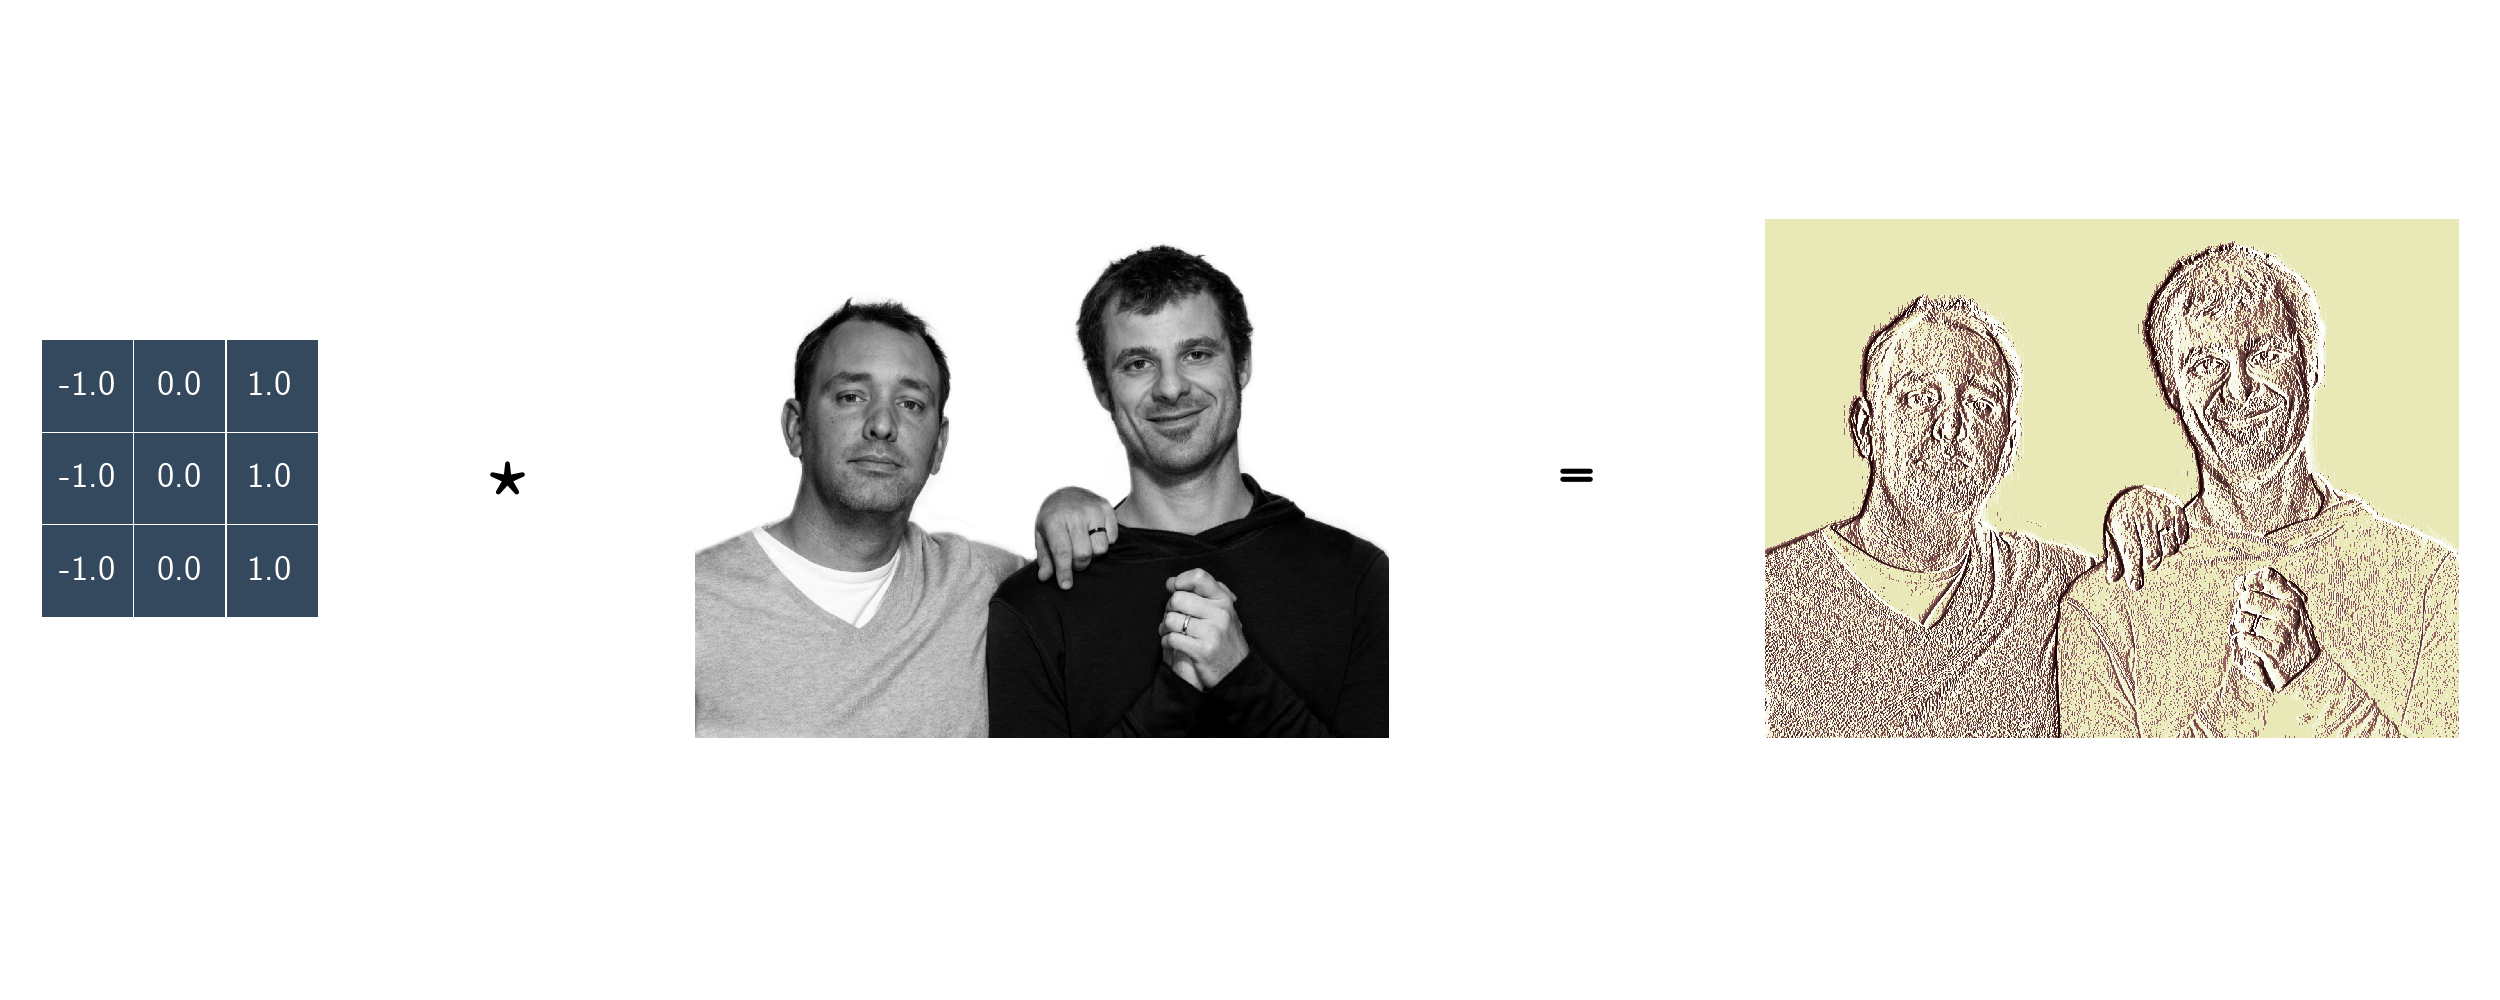

<IPython.core.display.Javascript object>


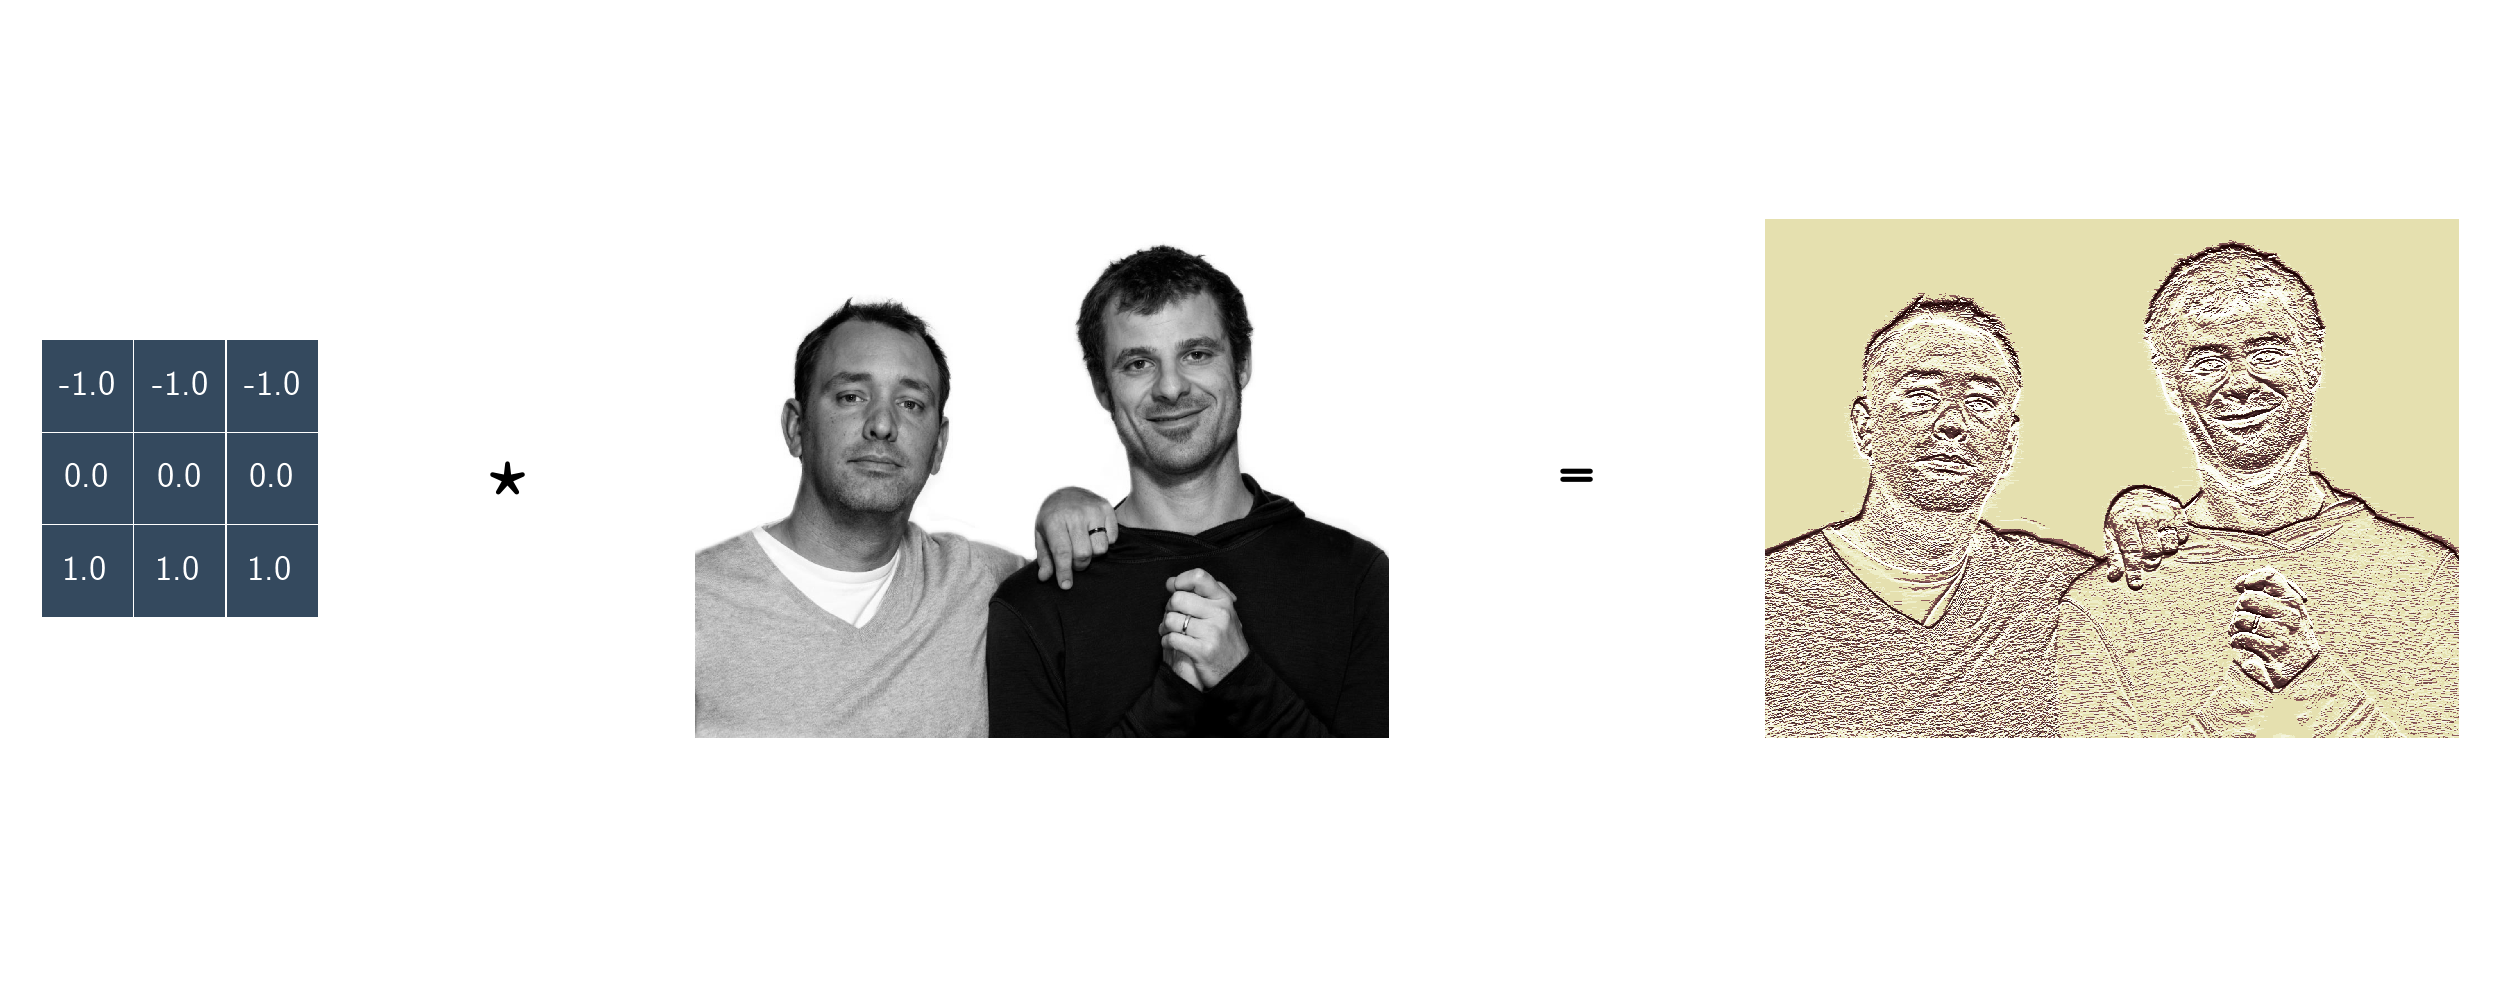

In [4]:
image_path = '../../mlrefined_images/convnet_images/dudes.png'

kernel_1 = np.array([[-1,  0,  1],
                     [-1,  0,  1],
                     [-1,  0,  1]])


kernel_2 = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

# compute and plot convolution images
convlib.kernel_viz.show_conv(image_path, kernel_1, contrast_normalization=True)
convlib.kernel_viz.show_conv(image_path, kernel_2, contrast_normalization=True)